In [1]:
from pytorchvideo.data.encoded_video import EncodedVideo

from torchvision.transforms import Compose, Lambda
from torchvision.transforms._transforms_video import (
    CenterCropVideo,
    NormalizeVideo,
)
from pytorchvideo.transforms import (
    ApplyTransformToKey,
    ShortSideScale,
    UniformTemporalSubsample
)

class SlowTransfrom(object):
    def __init__(self):
        side_size = 256
        mean = [0.45, 0.45, 0.45]
        std = [0.225, 0.225, 0.225]
        crop_size = 256
        num_frames = 8
        sampling_rate = 8
        frames_per_second = 30

        # Note that this transform is specific to the slow_R50 model.
        self.transform =  ApplyTransformToKey(
            key="video",
            transform=Compose(
                [
                    UniformTemporalSubsample(num_frames),
                    Lambda(lambda x: x/255.0),
                    NormalizeVideo(mean, std),
                    ShortSideScale(
                        size=side_size
                    ),
                    CenterCropVideo(crop_size=(crop_size, crop_size))
                ]
            ),
        )

        # The duration of the input clip is also specific to the model.
        self.clip_duration = (num_frames * sampling_rate)/frames_per_second

    def __call__(self, video_path):

        # Select the duration of the clip to load by specifying the start and end duration
        # The start_sec should correspond to where the action occurs in the video
        start_sec = 0
        end_sec = start_sec + self.clip_duration

        # Initialize an EncodedVideo helper class
        video = EncodedVideo.from_path(video_path)

        # Load the desired clip
        video_data = video.get_clip(start_sec=start_sec, end_sec=end_sec)

        # Apply a transform to normalize the video input
        video_data = self.transform(video_data)

        # Move the inputs to the desired device
        device = 'cpu' # 'cuda' if torch.cuda.is_available() else 'cpu'
        inputs = video_data["video"]
        inputs = inputs.to(device)[None, ...]

        return inputs

c:\Users\menez\Documents\VSCode\MLPlayground\.venv\Lib\site-packages\torchvision\transforms\_functional_video.py:6: UserWarning: The 'torchvision.transforms._functional_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms.functional' module instead.
  warnings.warn(
c:\Users\menez\Documents\VSCode\MLPlayground\.venv\Lib\site-packages\torchvision\transforms\_transforms_video.py:22: UserWarning: The 'torchvision.transforms._transforms_video' module is deprecated since 0.12 and will be removed in the future. Please use the 'torchvision.transforms' module instead.
  warnings.warn(
c:\Users\menez\Documents\VSCode\MLPlayground\.venv\Lib\site-packages\torchvision\transforms\functional_tensor.py:5: UserWarning: The torchvision.transforms.functional_tensor module is deprecated in 0.15 and will be **removed in 0.17**. Please don't rely on it. You probably just need to use APIs in torchvision.transforms.functional or in torchvision.trans

In [8]:
import os
import torch

SLOW_TRANSFORM = SlowTransfrom()
VID_DIR = "C://Users//menez//Documents//VSCode//MLPlayground//VideoClassification//data//UCF101_videos//UCF101"
DATA_DIR = "C://Users//menez//Documents//VSCode//MLPlayground//VideoClassification//data//UCF101_videos//Slow"

for file_label in os.listdir(VID_DIR):
    label = file_label.split("_")[1]
    data = SLOW_TRANSFORM(os.path.join(VID_DIR, file_label))
    if not (label in os.listdir(DATA_DIR)):
        os.mkdir(os.path.join(DATA_DIR, label))

    torch.save(data, os.path.join(DATA_DIR, label + "//" + file_label.replace(".avi", "") + ".pt"))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 8, 256, 256])
torch.Size([1, 3, 8, 256, 256])
torch.Size([1, 3, 8, 256, 256])
torch.Size([1, 3, 8, 256, 256])
torch.Size([1, 3, 8, 256, 256])
torch.Size([1, 3, 8, 256, 256])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 8, 256, 256])
torch.Size([1, 3, 8, 256, 256])
torch.Size([1, 3, 8, 256, 256])


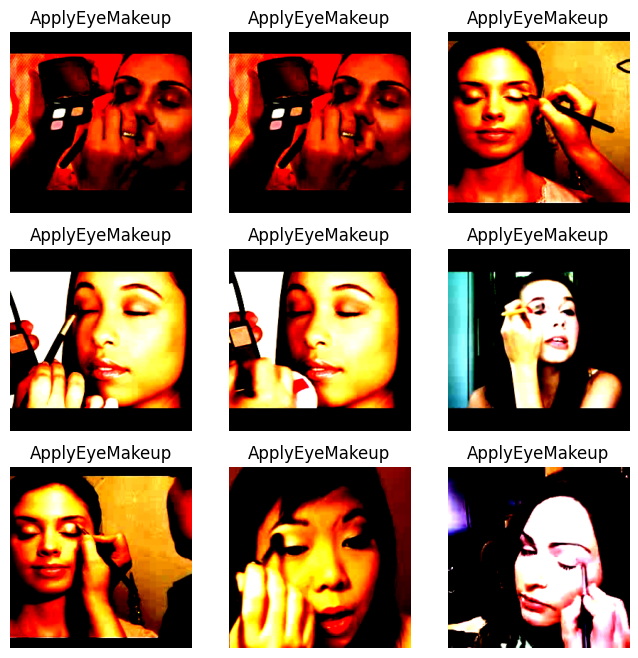

In [7]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3

# note: clipping notice results from the image tensor being normalized 
# to values outside the expected image format. i.e. nomalized values are
# good for learning but not for viewing

data = os.listdir(DATA_DIR + "//ApplyEyeMakeup")

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(data), size=(1,)).item()
    file_name = data[sample_idx]
    video = torch.load(DATA_DIR + "//" + "ApplyEyeMakeup" + "//" + file_name)
    # print(video.shape)
    # torch.Size([1, 3, 8, 256, 256])
    img = video[0, :, 0, :, :].permute(1, 2, 0)
    figure.add_subplot(rows, cols, i)
    plt.title("ApplyEyeMakeup")
    plt.axis("off")
    plt.imshow(img.cpu().squeeze(), cmap="gray")
plt.show()